In [35]:
'''
Algorithmic Trading Strategy
Auth (Eddie Gao)
Version (2022-06-05)
'''

# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
 

In [46]:
# Load data
from google.colab import files
uploaded = files.upload()


Saving AAPL.csv to AAPL (3).csv


In [47]:
# Store data
AAPL = pd.read_csv("AAPL.csv")

# Show data
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
179,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
180,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
181,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
182,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


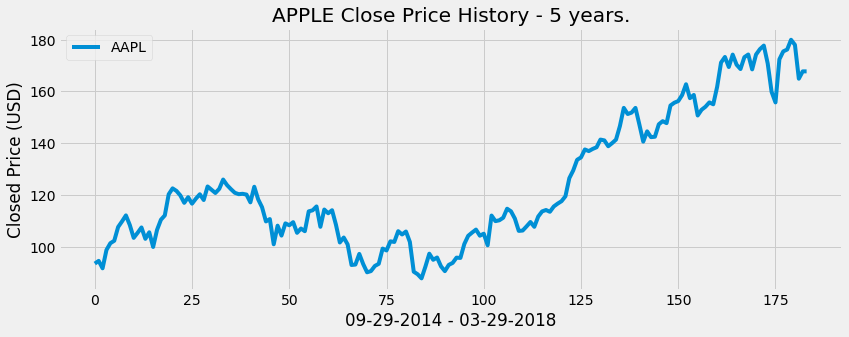

In [48]:
# Visualiza Data
plt.figure(figsize=(12.5, 4.5))

#Adj close is most precise info to go off on
plt.plot(AAPL["Adj Close"], label = "AAPL")

# Labels
plt.title("APPLE Close Price History - 5 years.")
plt.xlabel("09-29-2014 - 03-29-2018")
plt.ylabel("Closed Price (USD)")
plt.legend(loc="upper left")
plt.show()

In [49]:
# Create simple moving averages (SMA)

'''
A simple moving average smooths out volatility and makes it easier to view the price trend of a security. 
If the simple moving average points up, this means that the security's price is increasing. 
If it is pointing down, it means that the security's price is decreasing.
'''

SMA30 = pd.DataFrame()
# Window = 30 = avg of last 30 days 
SMA30["Adj Close"] = AAPL["Adj Close"].rolling(window = 30).mean()

# Show data
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
179,166.220082
180,166.944129
181,167.154109
182,167.320155


In [50]:
# Create longer term avg

SMA100 = pd.DataFrame()
SMA100["Adj Close"] = AAPL["Adj Close"].rolling(window = 100).mean()

# Show SMA
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
179,133.802447
180,134.523642
181,135.154237
182,135.928340


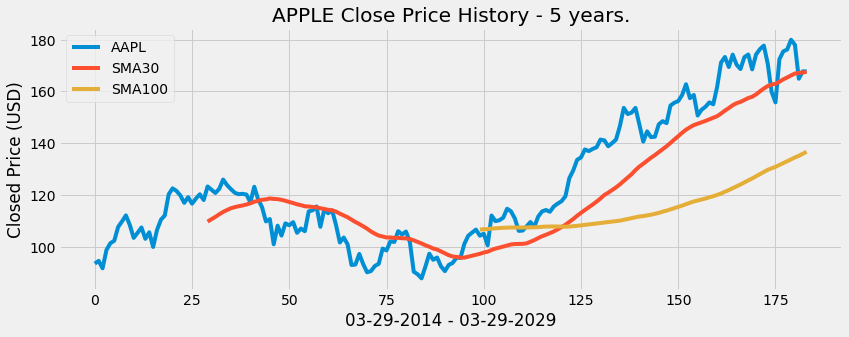

In [51]:
# Now that we have both data sets, we can visualize it.

# Visualiza Data
plt.figure(figsize=(12.5, 4.5))

plt.plot(AAPL["Adj Close"], label = "AAPL")
plt.plot(SMA30["Adj Close"], label = "SMA30")
plt.plot(SMA100["Adj Close"], label = "SMA100")

plt.title("APPLE Close Price History - 5 years.")
plt.xlabel("03-29-2014 - 03-29-2029")
plt.ylabel("Closed Price (USD)")
plt.legend(loc="upper left")
plt.show()

In [52]:
# Create new data frame to store all data

data = pd.DataFrame()
data["AAPL"] = AAPL["Adj Close"]
data["SMA30"] = SMA30["Adj Close"]
data["SMA100"] = SMA100["Adj Close"]

data

,AAPL,SMA30,SMA100
0,93.514290,NaN,NaN
1,94.556244,NaN,NaN
2,91.683792,NaN,NaN
3,98.771042,NaN,NaN
4,101.380676,NaN,NaN
...,...,...,...
179,179.979996,166.220082,133.802447
180,178.020004,166.944129,134.523642
181,164.940002,167.154109,135.154237
182,167.779999,167.320155,135.928340


In [53]:
# Finally, create the function to signal when to buy or sell stock

def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []

  flag = -1

  for i in range(len(data)):
    if data["SMA30"][i] > data["SMA100"][i]:
      if flag != 1:
        sigPriceBuy.append(data["AAPL"][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data["SMA30"][i] < data["SMA100"][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data["AAPL"][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)
         
  

In [54]:
# Store buy and sell data into variables

buy_sell = buy_sell(data)
data["Buy_Signal_Price"] = buy_sell[0]
data["Sell_Signal_Price"] = buy_sell[1]

In [44]:
# Now show the data
# All data manipulation to the original dataset (AAPL.csv) is found here --
data

,AAPL,SMA30,SMA100
0,93.514290,NaN,NaN
1,94.556244,NaN,NaN
2,91.683792,NaN,NaN
3,98.771042,NaN,NaN
4,101.380676,NaN,NaN
...,...,...,...
179,179.979996,166.220082,133.802447
180,178.020004,166.944129,134.523642
181,164.940002,167.154109,135.154237
182,167.779999,167.320155,135.928340


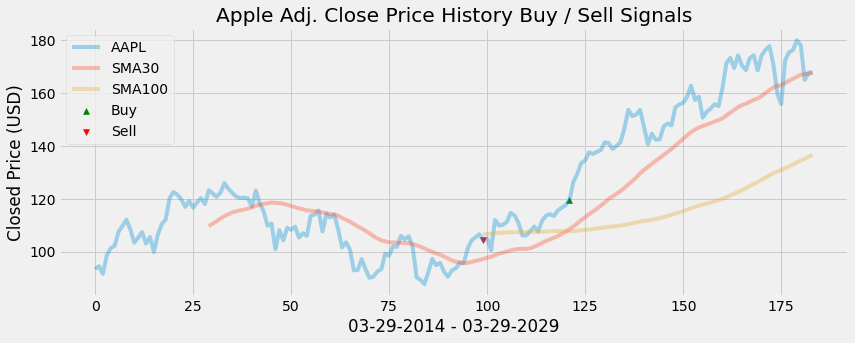

In [55]:
# Visualise new data and the strategy to buy or sell stock
plt.figure(figsize = (12.6, 4.6))
plt.plot(data["AAPL"], label = "AAPL", alpha = 0.35)
plt.plot(data["SMA30"], label = "SMA30", alpha = 0.35)
plt.plot(data["SMA100"], label = "SMA100", alpha = 0.35)
# Labelling scatter plot of buy and sell trends
plt.scatter(data.index, data["Buy_Signal_Price"], label = "Buy", marker = "^", color = "green")
plt.scatter(data.index, data["Sell_Signal_Price"], label = "Sell", marker = "v", color = "red")
plt.title("Apple Adj. Close Price History Buy / Sell Signals")
plt.xlabel("03-29-2014 - 03-29-2029")
plt.ylabel("Closed Price (USD)")
plt.legend(loc="upper left")
plt.show()